Bank Direct Marketing Project

By Elma Fortunate Phiri

About Dataset:

The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed

Aim: To build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioural data.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp
%matplotlib inline

In [47]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder


Data Loading and Preprocessing

In [3]:
bank_data  = pd.read_csv("C:\\Users\\elmaf\\Desktop\\Portfolio projects\\Python\\Term Deposit Prediction\\bank_data.csv")
bank_data .head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

Data Exploration

In [4]:
bank_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank_data .describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [6]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
bank_data.shape

(41188, 21)

In [8]:
bank_data.index

RangeIndex(start=0, stop=41188, step=1)

In [9]:
bank_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
pp.ProfileReport(bank_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Our Profile Report shows the following:
1. There are no null values
2. The are duplicate rows
3.Number of observations is 41188

Data Preprocessing

In [11]:
#dropping duplicate values
bank_data.drop_duplicates()

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41176 rows x 21 columns]

In [12]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
#checking for null values
bank_data.isna().sum().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

There are no missing values in our dataset

In [14]:
#correlation
bank_data.select_dtypes(["int",'float']).corr()

age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754        0.127836      -0.013733   0.135133   
pdays               0.271004        0.078889      -0.091342   0.296899   
previous           -0.420489       -0.203130      -0.050936  -0.454494   
emp.var.rate        1.000000        0.775334       0.196041   0.972245   
cons.price.idx      0.775334        1.000000       0.058986   0.688230   
cons.conf.idx       0.196041        0.058986       1.000000   0.277686   
euribor3m           0.972245        0.688230       0.277686   1.000000   
nr.employed         0.906970        0.522034       0.100513   0.945154   

                nr.employed  
age               -0.017725  
duration          -0.044703  
campaign           0.144095  
pdays              0.372605  
previous          -0.501333  
emp.var.rate       0.906970  
cons.price.idx     0.522034  
cons.conf.idx      0.100513  
euribor3m          0.945154  
nr.employed        1.000000

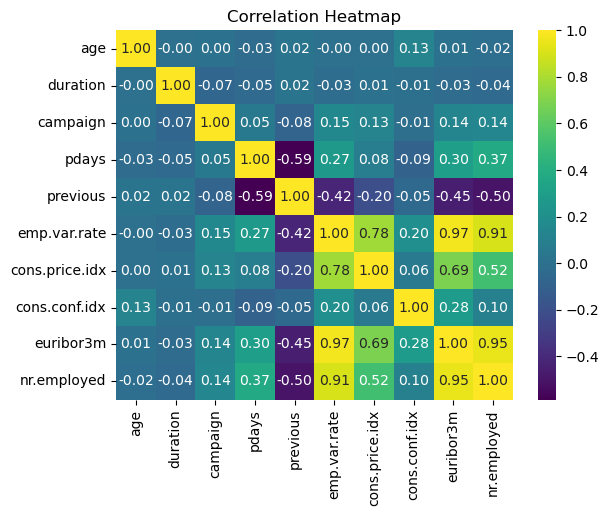

In [15]:
#Visualising correlation
sns.heatmap(bank_data.select_dtypes(["int",'float']).corr(), fmt='.2f',annot= True,cmap= "viridis")
plt.title("Correlation Heatmap")
plt.show()

Explanation:


-1 indicates a perfect negative linear relationship


0 indicates no linear relationship


1 indicates a perfect positive linear relationship

From our correlation matrix the following conclusions are drawn:
1. nr.employed is highly correlated with euribor3m with a correlation value of 0.95


2.emp.var.rate is higly correlated with euribor3m with a correlation value of 0.97


3.nr.employed is higly correlated with emp.var.rate with a correlation value of 0.91


In [16]:
bank_data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

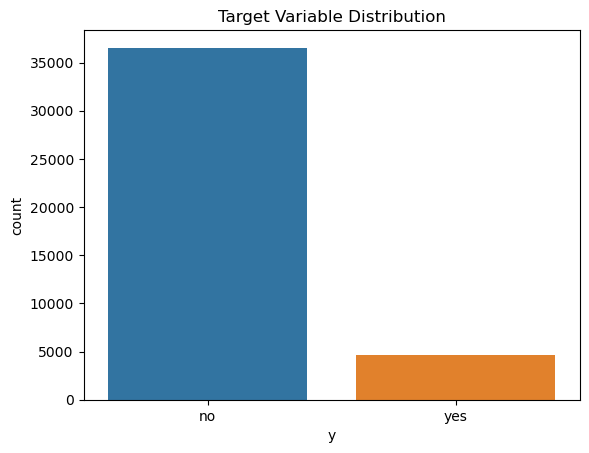

In [17]:
#Visualize target variable
sns.countplot(x = 'y', data= bank_data)
plt.title("Target Variable Distribution")
plt.show()

In [18]:
#Term deposit frequency according to marital status
pd.crosstab(bank_data.y,bank_data.marital)

marital  divorced  married  single  unknown
y                                          
no           4136    22396    9948       68
yes           476     2532    1620       12

This shows the number of people who subscribed to the term deposit(yes) and those who did not(no) according to their marial status

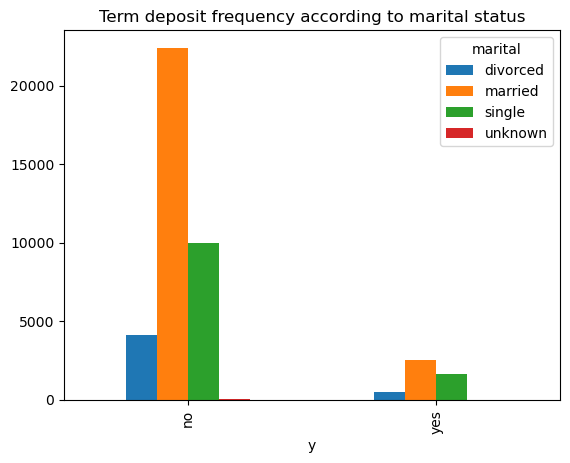

In [19]:
#Visualising the Term deposit frequency according to marital status
pd.crosstab(bank_data.y,bank_data.marital).plot( kind = "bar")
plt.title("Term deposit frequency according to marital status")
plt.show()

In [20]:
#Term deposit frequency according to marital status
pd.crosstab(bank_data.y,bank_data.job)


job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no     9070         8616          1332        954        2596     1286   
yes    1352          638           124        106         328      434   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no            1272      3646      600        6013         870      293  
yes            149       323      275         730         144       37

In [21]:
#Categorical variables
bank_data.select_dtypes("object")

job  marital            education  default housing loan  \
0        housemaid  married             basic.4y       no      no   no   
1         services  married          high.school  unknown      no   no   
2         services  married          high.school       no     yes   no   
3           admin.  married             basic.6y       no      no   no   
4         services  married          high.school       no      no  yes   
...            ...      ...                  ...      ...     ...  ...   
41183      retired  married  professional.course       no     yes   no   
41184  blue-collar  married  professional.course       no      no   no   
41185      retired  married    university.degree       no     yes   no   
41186   technician  married  professional.course       no      no   no   
41187      retired  married  professional.course       no     yes   no   

         contact month day_of_week     poutcome    y  
0      telephone   may         mon  nonexistent   no  
1      telephone   may         mon  nonexistent   no  
2      telephone   may         mon  nonexistent   no  
3      telephone   may         mon  nonexistent   no  
4      telephone   may         mon  nonexistent   no  
...          ...   ...         ...          ...  ...  
41183   cellular   nov         fri  nonexistent  yes  
41184   cellular   nov         fri  nonexistent   no  
41185   cellular   nov         fri  nonexistent   no  
41186   cellular   nov         fri  nonexistent  yes  
41187   cellular   nov         fri      failure   no  

[41188 rows x 11 columns]

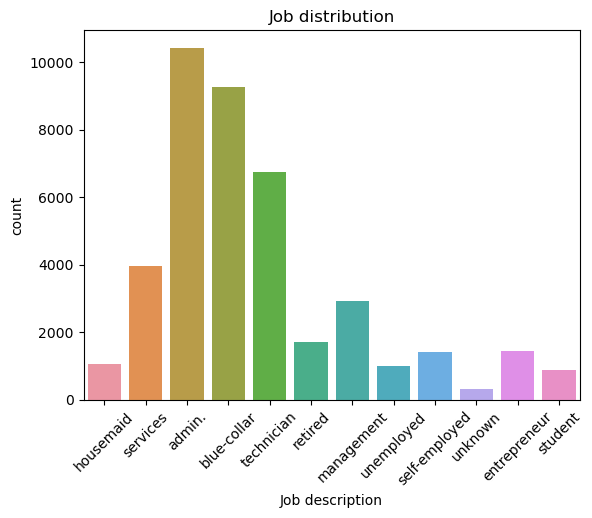

In [22]:
#Visualising categorical values
sns.countplot(x = 'job', data= bank_data)
plt.title("Job distribution")
plt.xlabel("Job description")
plt.xticks(rotation = 45)
plt.show()

From our graph we observe that have the highest count of jobs  


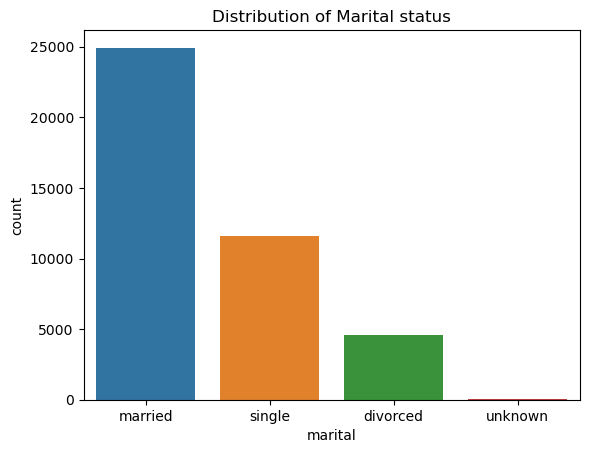

In [23]:
#Visualisng Marital Status
sns.countplot(x = 'marital', data = bank_data)
plt.title("Distribution of Marital status")
plt.show()

From our graph, we observe that our dataset contains variables of people, with more than fifty percent of our observations being married, followed by single people.

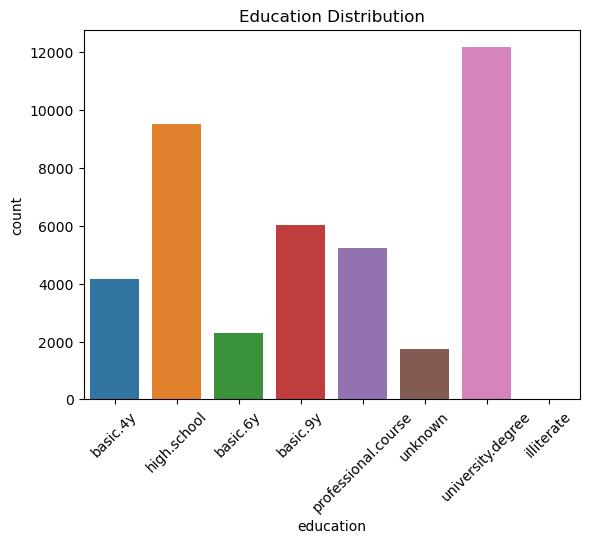

In [24]:
#Visualising education distribution
sns.countplot(x ="education", data = bank_data)
plt.title("Education Distribution")
plt.xticks(rotation = 45)
plt.show()

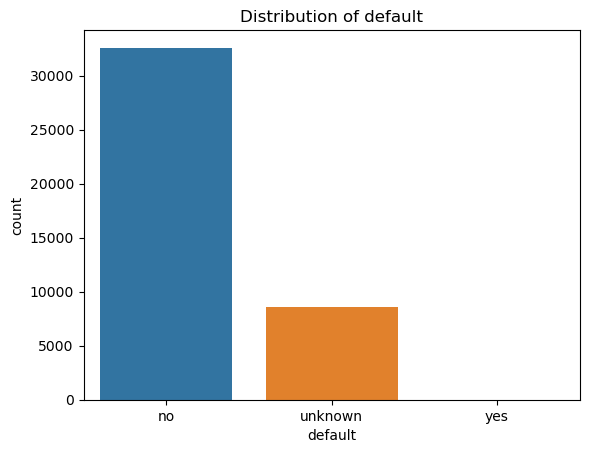

In [25]:
#Visualising the default column
sns.countplot(x = 'default', data = bank_data)
plt.title('Distribution of default')
plt.show()


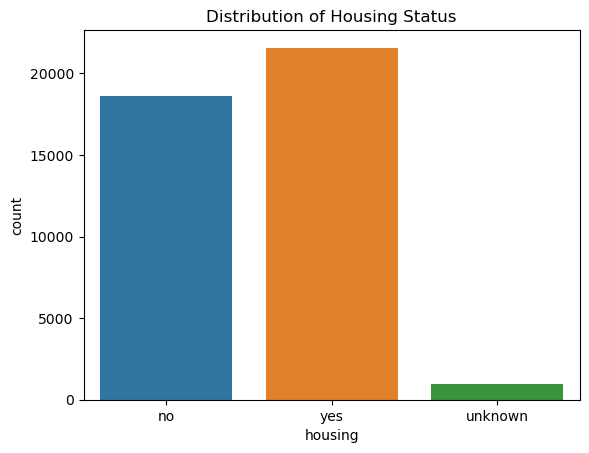

In [26]:
#Visualising housing column
sns.countplot(x = 'housing', data = bank_data)
plt.title("Distribution of Housing Status")
plt.show()

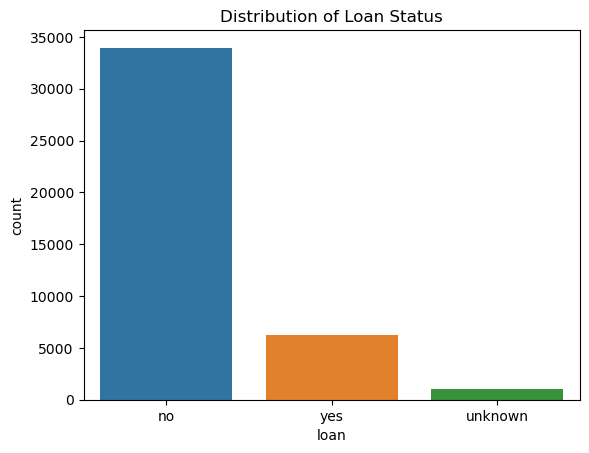

In [27]:
#Visualising loan column
sns.countplot(x ='loan', data = bank_data)
plt.title("Distribution of Loan Status")
plt.show()


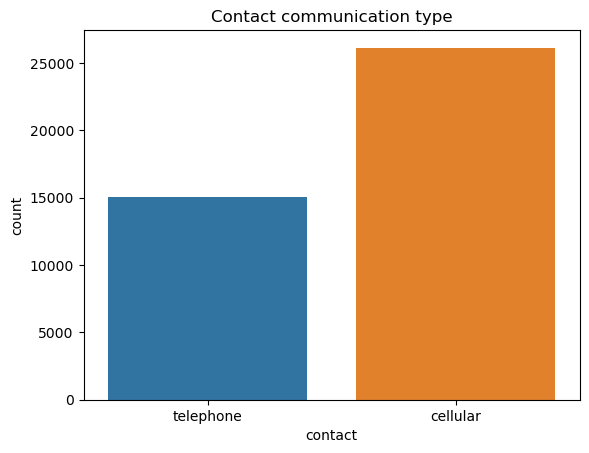

In [28]:
#Visualising contact column
sns.countplot(x = 'contact', data = bank_data)
plt.title("Contact communication type")
plt.show()

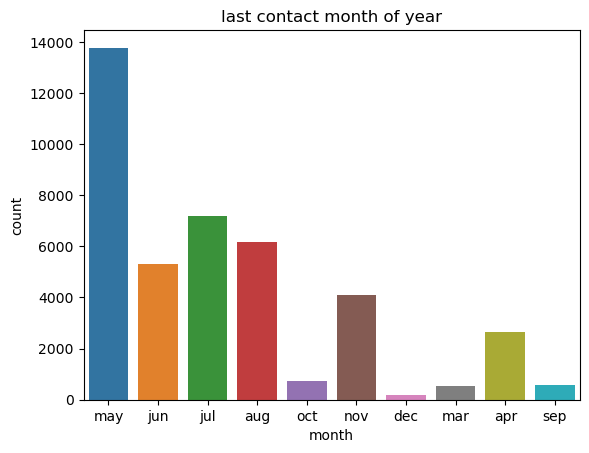

In [29]:
#Visualising month column
sns.countplot(x = 'month', data = bank_data)
plt.title("last contact month of year")
plt.show()

From the graph, we observe that the month of May has the highest count of contact and December has the least

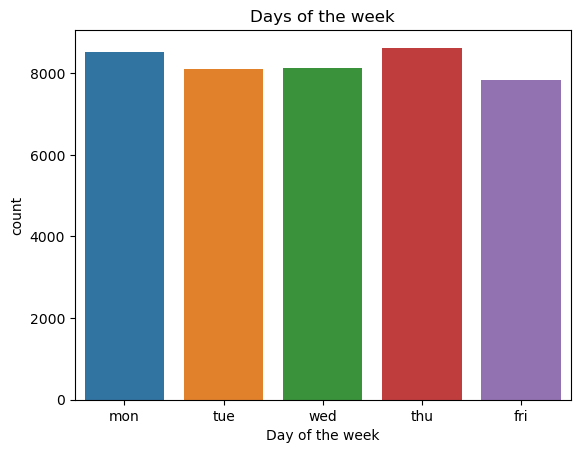

In [30]:
#Visualising day of the week
sns.countplot(x = 'day_of_week', data = bank_data)
plt.xlabel("Day of the week")
plt.title("Days of the week")
plt.show()

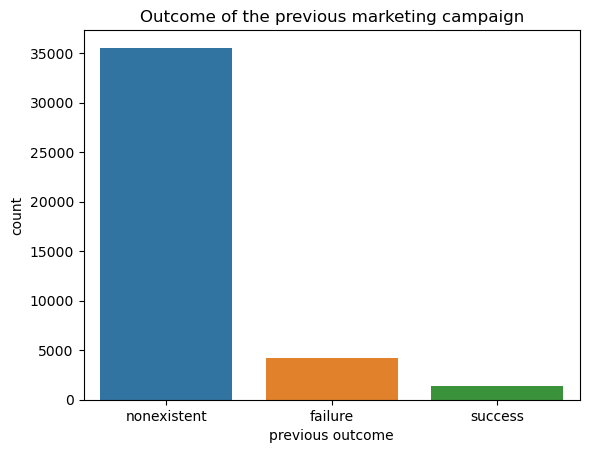

In [31]:
#Visualising poutcome column
sns.countplot(x = 'poutcome', data = bank_data)
plt.title("Outcome of the previous marketing campaign")
plt.xlabel("previous outcome")
plt.show()

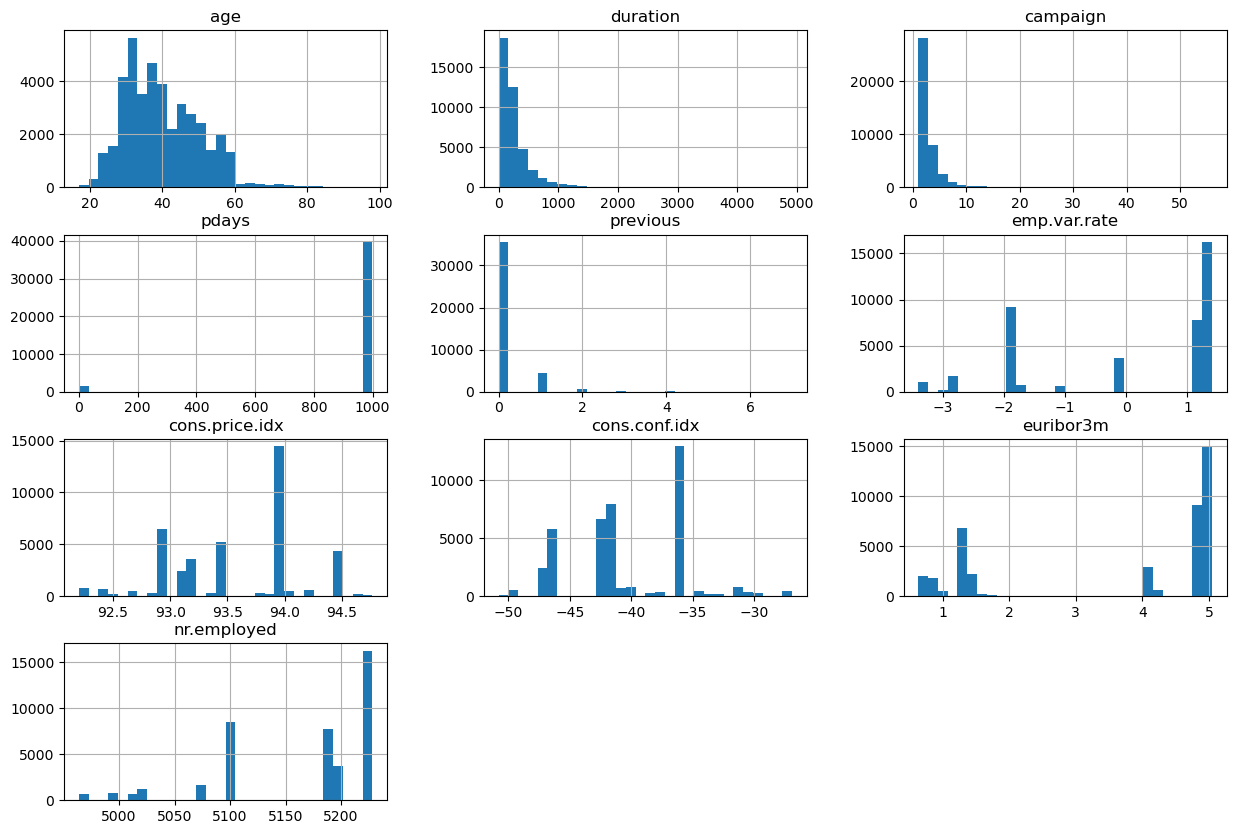

In [32]:
#Exploring numerical variables
bank_data.select_dtypes(["int", "float"]).hist(bins = 30, figsize= (15,10))
plt.show()


Model Preprocessing


In [33]:
print(bank_data.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [34]:
#Encoding categorical variables
cat_values = ['job','marital','education','default','housing','loan','contact','month','day_of_week', 'poutcome']
bank_data = pd.get_dummies(bank_data, columns = cat_values, drop_first= True)

In [35]:
#Label encoding the target variable
le = LabelEncoder()
bank_data['y'] = le.fit_transform(bank_data['y'])

In [36]:
#Feature scaling
numerical_values = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler  = StandardScaler()
bank_data[numerical_values] = scaler.fit_transform(bank_data[numerical_values])

In [37]:
bank_data.dtypes

age                              float64
duration                         float64
campaign                         float64
pdays                            float64
previous                         float64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                  int32
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
job_unknown                        uint8
marital_married                    uint8
marital_single                     uint8
marital_unknown 

Model Building


In [38]:
#Train test split
#train-test split
X = bank_data.drop('y', axis=1)
y = bank_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [39]:
#Model training
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Hyperparameter Tuning

In [40]:
#Grid Search 
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
model_grid = GridSearchCV(model, param_grid, cv = 3, n_jobs=-1, verbose=2)
model_grid.fit(X_train,y_train)
print("\n Best Parameters:",model_grid.best_params_,"\n Best estimators:", model_grid.best_estimator_,"\nBest Score: ", model_grid.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits

 Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2} 
 Best estimators: DecisionTreeClassifier(max_depth=5) 
Best Score:  0.9131411780155859


In [41]:
#Model Predictions
y_pred = model_grid.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [42]:
#Calculating accuracy
Accuracy = accuracy_score(y_pred,y_test)
Accuracy

0.9150279193979121

Our model is 91.5% accurate

In [43]:
# Evaluation metrics
print(confusion_matrix(y_test, y_pred))

[[7031  272]
 [ 428  507]]


The confusion matrix shows the following:

True Negatives (TN): 7,031 - These are the number of correctly predicted negative instances (Predicted Negative and Actual Negative).


False Positives (FP): 272 - These are the number of instances that were predicted as positive but were actually negative (Predicted Positive but Actual Negative).


False Negatives (FN): 428 - These are the number of instances that were predicted as negative but were actually positive (Predicted Negative but Actual Positive).


True Positives (TP): 507 - These are the number of correctly predicted positive instances (Predicted Positive and Actual Positive).

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.54      0.59       935

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238



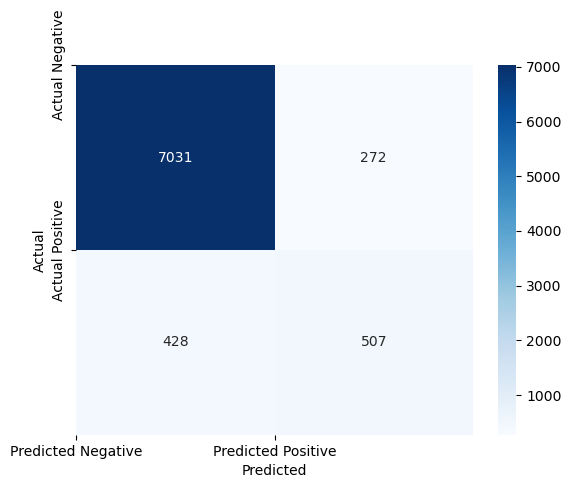

In [44]:
#Classification Report
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap= 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.show()

The classification report shows the following:


 For the positive class (1),the precision is 0.65, which means that 65% of the instances predicted as positive were actually positive

 For the positive class (1), the recall is 0.54, which means that the model correctly identified 54% of the actual positive instances.

The overall accuracy of the model is 0.92, which means that the model correctly classified 92% of the instances.

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) curve')

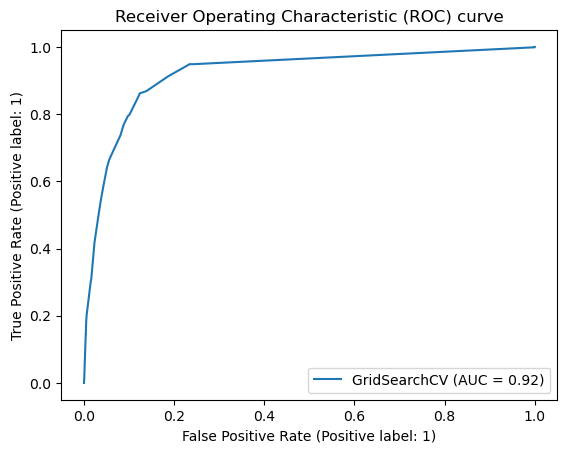

In [45]:
#ROC display curve
fpr,tpr, thresholds = roc_curve(y_test,y_pred)
RocCurveDisplay.from_estimator(estimator= model_grid,X = X_test, y =y_test)
plt.title("Receiver Operating Characteristic (ROC) curve")

Text(0, 0.5, 'Importance Score')

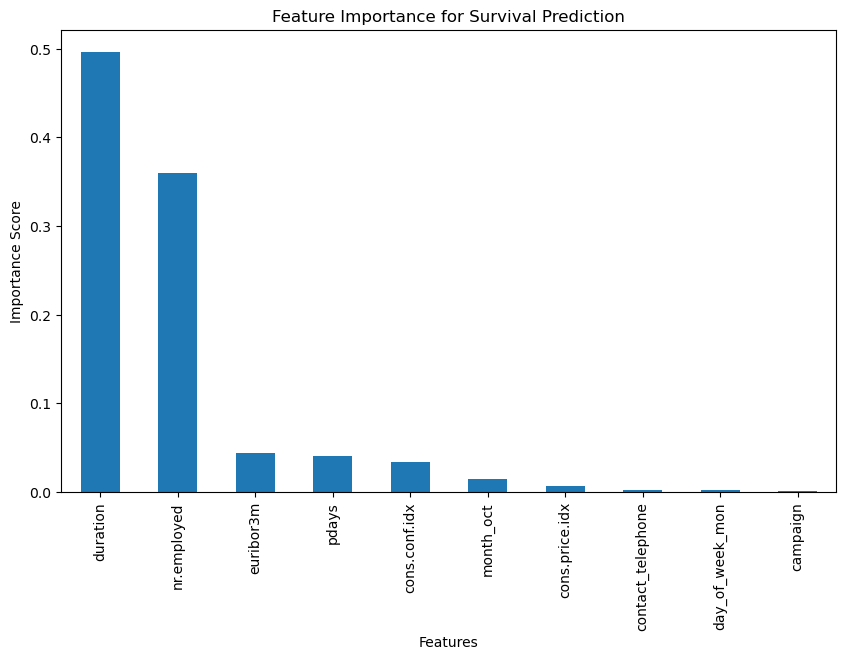

In [46]:
#Feature Importance
best_dt = model_grid.best_estimator_  # Retrieve the best estimator from RandomizedSearchCV
features = X.columns 

# Get feature importances from the best RandomForestClassifier model
feature_importances = best_dt.feature_importances_
feature_importances = pd.Series(feature_importances, index=features)
feature_importances = feature_importances.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance for Survival Prediction')
plt.xlabel('Features')
plt.ylabel('Importance Score')


The bar plot shows the relative importance of each feature in the model's predictions. Features with higher importance values have a greater influence on the model's output, indicating that they are more significant predictors.

Conclusion:

The top features with the highest importance scores represent the key drivers or most influential factors in predicting the target variable.This information can help focus resources and decision-making on the areas that have the greatest impact.

The business can enhance its marketing campaign by focusing on the most influential features identified in the analysis. This can help improve the effectiveness and efficiency of the marketing efforts.

The business can use the feature importance information to optimize its marketing processes, such as targeted marketing campaigns, customer segmentation, and resource allocation.

Features with low importance scores may indicate areas where the business can streamline operations, reduce unnecessary investments, or explore alternative strategies. This information can help the business allocate resources more effectively.

By leveraging the insights from the feature importance analysis, the business can make more informed decisions, optimize its marketing processes, and enhance its overall marketing campaign to ensure that the number of term deposit subscriptions increase.